## Texi Guru Kaggle Challange

### important imports and data extraction

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV

from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_validate
from sklearn.model_selection import validation_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

from sklearn.metrics import mean_squared_error

### Importing data

In [36]:
try: # For kaggle
  train_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')

  test_pd = pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv')
  print('running on kaggle')
except: #for local machine 
  print('running on local machine')
  train_pd = pd.read_csv('train.csv')
  test_pd = pd.read_csv('test.csv')
  pass
copy_train_pd = train_pd.copy()
copy_test_pd = test_pd.copy()
train_pd.info()

running on local machine


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

null vales detection 

In [37]:
train_pd.isna().sum()

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

**Creating copies of test data and train data**

In [38]:
train_pd = copy_train_pd.copy()
# TODO: will check and can be done after applying preprocessing
# y = train_pd['total_amount']
# X = train_pd.drop('total_amount', axis= 1)
# list_of_features = list()

In [39]:
x_train, x_test = train_test_split(train_pd, test_size= 0.1)
x_train_copy = x_train.copy()
x_test_copy = x_test.copy()

### Preprocessing section
* Selection of important features
* transformation of features
* features plotting
* correlation detection among features
* apply pca for dimensionality reduction



In [40]:
print('Null values in the given training data set is:')
x_train.isna().sum()

Null values in the given training data set is:


VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          5464
trip_distance               0
RatecodeID               5464
store_and_fwd_flag       5464
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     5464
Airport_fee              5464
dtype: int64

In [41]:
print(f'''
unique values of passanger_count is: {x_train['passenger_count'].unique()}\n
unique values of RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique values of store_and_fwd_flag is: {x_train['store_and_fwd_flag'].unique()}\n
unique values of congestion_surcharge is: {x_train['congestion_surcharge'].unique()}\n
unqiue values of airport_fees is: {x_train['Airport_fee'].unique()}\n
''')



unique values of passanger_count is: [ 2.  3.  1.  0.  4. nan  6.  5.  8.]

unique values of RateCodeId is: [ 1.  2. nan  5.  3. 99.  4.]

unique values of store_and_fwd_flag is: ['N' nan 'Y']

unique values of congestion_surcharge is: [ 2.5  0.   nan -2.5]

unqiue values of airport_fees is: [ 0.    1.75   nan -1.75]




**According to my observations vendorId is also an categorical vairable and ratecodeid also becuase these items are ids which are represented as numbers**

In [42]:
print(f''' 
unique values for vendorId is: {x_train['VendorID'].unique()}\n
unique values for RateCodeId is: {x_train['RatecodeID'].unique()}\n
unique valuse for PULocationID is: {x_train['PULocationID'].unique()}\n
unique valuse for DoLocationID is: {x_train['DOLocationID'].unique()}\n
''')

 
unique values for vendorId is: [1 0 2]

unique values for RateCodeId is: [ 1.  2. nan  5.  3. 99.  4.]

unique valuse for PULocationID is: [199  64 264  58 103  18 205  42  94 233 211 227 139  15 224  24  36 138
 105 242 222 171 263 258  75  95  99 110 214  70 244 248   7  84  73  59
  83 151 166 215 184  65  98  47  82 112 250  80  25 149 177 216  16 102
 225 259 116  85 239 198 136 253 191 201 229 100 167 223 192   1   3  90
 114 118  55  61 155  22 220 218 262  87 254  31  27  63 181  40 206 146
  20 143 158  81 213 160  88  67 134 162  57 169 194 246   2  96  13 119
  49  92 165 261 157 231 178 240 234 212  52  97  76  74  26 130   9  79
 141 175 104 168 182  10 176 101 257  29  44 255 217  78  69 186 153 172
  30 204  19 111 235 145  48  11 196  72 106  34  33 237   6 183   8  28
 179  12 238 236  53  21 144 161 188 127 241   5 170  45 249 226  37  51
 164  54 245 174 208  71 207 256  41 189 126 142  56 133 252 108 159  93
 154 180   4 187 107 197 195  14  66  50  77 203 123 219

In [43]:
x_train.describe() #* Description of complete data elements

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
count,157500.000000,152036.000000,157500.000000,152036.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,152036.000000,152036.000000
mean,0.728057,1.358428,5.311935,1.511642,132.668908,132.694159,1.933640,6.127660,0.646159,0.979621,29.644252,2.246968,0.158683
std,0.445846,0.891834,416.332801,6.465423,76.189425,76.148608,1.948499,4.633414,2.328171,0.199034,25.507610,0.819248,0.511962
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000129,-29.300000,-1.000000,-576.750000,-2.500000,-1.750000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.472838,0.000000,1.000000,16.300000,2.500000,0.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.283038,0.000000,1.000000,21.450000,2.500000,0.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.500165,0.000000,1.000000,31.800000,2.500000,0.000000
max,2.000000,8.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,587.250000,2.500000,1.750000


### Plot chart preparation
plots different types of plots for batter insight

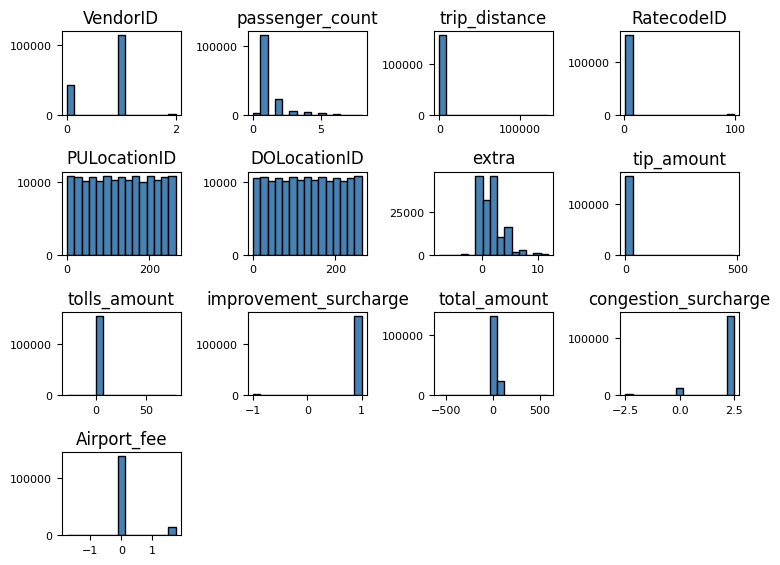

In [44]:
x_train.hist(bins= 15, color= 'steelblue', edgecolor='black', linewidth= 1.0,
             xlabelsize= 8, ylabelsize= 8, grid= False)

plt.tight_layout(rect=(0, 0, 1.2, 1.2))

### plotting pair waise plot for corelation detection

In [45]:
# sns.pairplot(X) ## Do not run this cell again
#* please prefer pairplot.png for details

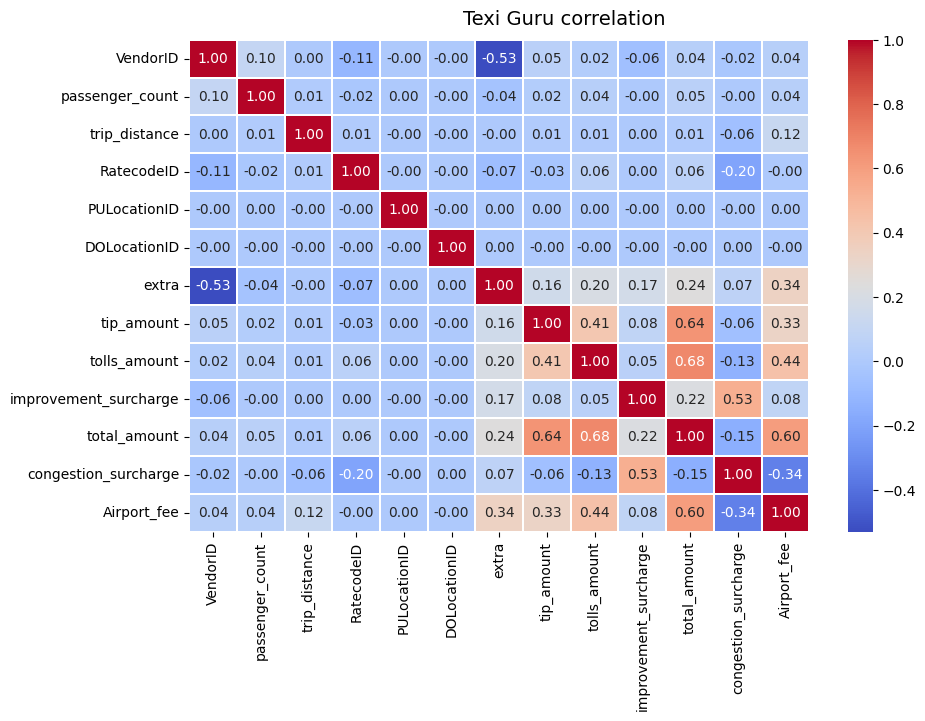

In [46]:
f, ax = plt.subplots(figsize=(10,6))
corr = x_train.corr(numeric_only= True)
heat_map = sns.heatmap(round(corr, 2), annot= True, ax=ax, cmap='coolwarm',
                       fmt='.2f', linewidths=0.05)
f.subplots_adjust(top= 0.93)
t = f.suptitle('Texi Guru correlation', fontsize= 14)


#### Converting datetime into datetime object

In [47]:
def convert_dt_obj_to_datetime(df:pd.DataFrame, col_name:str):
    df[col_name] = pd.to_datetime(df[col_name])
    df[col_name +'_Year'] = df[col_name].apply(lambda time: time.year)
    df[col_name +'_Month'] = df[col_name].apply(lambda time: time.month)
    df[col_name +'_Day'] = df[col_name].apply(lambda time: time.day)
    df[col_name +'_Hour'] = df[col_name].apply(lambda time: time.hour)
#     df[col_name +'_Minute'] = df[col_name].apply(lambda time: time.minute) # IGNORING MINS

In [48]:
x_train, x_test = x_train_copy.copy(), x_test_copy.copy()

convert_dt_obj_to_datetime(x_train, 'tpep_pickup_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_pickup_datetime')
x_train = x_train.drop('tpep_pickup_datetime', axis= 1)
x_test = x_test.drop('tpep_pickup_datetime', axis= 1)

convert_dt_obj_to_datetime(x_train, 'tpep_dropoff_datetime')
convert_dt_obj_to_datetime(x_test, 'tpep_dropoff_datetime')

x_train = x_train.drop('tpep_dropoff_datetime', axis= 1)
x_test = x_test.drop('tpep_dropoff_datetime', axis= 1)

x_train.info()
x_train_copy, x_test_copy = x_train.copy(), x_test.copy()

<class 'pandas.core.frame.DataFrame'>
Index: 157500 entries, 102940 to 96121
Data columns (total 23 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   VendorID                     157500 non-null  int64  
 1   passenger_count              152036 non-null  float64
 2   trip_distance                157500 non-null  float64
 3   RatecodeID                   152036 non-null  float64
 4   store_and_fwd_flag           152036 non-null  object 
 5   PULocationID                 157500 non-null  int64  
 6   DOLocationID                 157500 non-null  int64  
 7   payment_type                 157500 non-null  object 
 8   extra                        157500 non-null  float64
 9   tip_amount                   157500 non-null  float64
 10  tolls_amount                 157500 non-null  float64
 11  improvement_surcharge        157500 non-null  float64
 12  total_amount                 157500 non-null  float64
 13  

In [49]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157500.000000,152036.000000,157500.000000,152036.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,157500.000000,...,152036.000000,152036.000000,157500.0,157500.000000,157500.000000,157500.000000,157500.0,157500.000000,157500.000000,157500.000000
mean,0.728057,1.358428,5.311935,1.511642,132.668908,132.694159,1.933640,6.127660,0.646159,0.979621,...,2.246968,0.158683,2023.0,6.004273,29.060546,15.113054,2023.0,6.007765,28.968806,15.100463
std,0.445846,0.891834,416.332801,6.465423,76.189425,76.148608,1.948499,4.633414,2.328171,0.199034,...,0.819248,0.511962,0.0,0.065229,1.980019,5.768690,0.0,0.087777,2.580299,5.947714
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000129,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.472838,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.283038,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.500165,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,8.000000,135182.060000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


### trying to remove outliers form the dataset

In [50]:
x_train = x_train_copy.copy() # reseting dataset
# print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))
# train_pd_filtered_toll_amt = x_train[(x_train.tolls_amount >= 0)]
# print('len of wallet user', len(train_pd_filtered_toll_amt[train_pd_filtered_toll_amt.payment_type == 'Wallet']))
# train_pd_filtered_extra = train_pd_filtered_toll_amt[(train_pd_filtered_toll_amt.extra >= 0)]
# print('len of wallet user', len(train_pd_filtered_extra[train_pd_filtered_extra.payment_type == 'Wallet']))
# # train_pd_filtered_airport_fee = train_pd_filtered_extra.copy() # TODO: need to check for batter solution 
# print('airport unique values before filter', train_pd_filtered_extra.Airport_fee.unique())
# train_pd_filtered_airport_fee =  train_pd_filtered_extra[(train_pd_filtered_extra.Airport_fee != -1.75)]
# print('airport unique values after filter', train_pd_filtered_airport_fee.Airport_fee.unique())
# print('len of wallet user', len(train_pd_filtered_airport_fee[train_pd_filtered_airport_fee.payment_type == 'Wallet']))
# ## same assumption with negative congestion surcharge and improvement surcharge
# train_pd_filtered_improvement_surcharge = train_pd_filtered_airport_fee[(train_pd_filtered_airport_fee.improvement_surcharge >= 0)]
# print('len of wallet user', len(train_pd_filtered_improvement_surcharge[train_pd_filtered_improvement_surcharge.payment_type == 'Wallet']))
# print('congestion surcharge unique', train_pd_filtered_improvement_surcharge['congestion_surcharge'].unique())
# train_pd_filtered_congestion_surcharge = train_pd_filtered_improvement_surcharge.copy() #TODO: need to check batter solution
# # train_pd_filtered_congestion_surcharge = train

# print('len of wallet user', len(train_pd_filtered_congestion_surcharge[train_pd_filtered_congestion_surcharge.payment_type == 'Wallet']))

# x_train = train_pd_filtered_congestion_surcharge.copy()
# print('vendor ids after outlier removal', x_train.VendorID.unique())

# # x_train.info()
# print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))


In [51]:
### removing distance outliers
print(len(x_train[x_train.trip_distance > 100]))
x_train_distance_fitler = x_train[x_train.trip_distance <= 100]
x_train = x_train_distance_fitler.copy()
print('vendor ids after outlier removal', x_train.VendorID.unique())
print('len of wallet user', len(x_train[x_train.payment_type == 'Wallet']))

7
vendor ids after outlier removal [1 0 2]
len of wallet user 5461


**X_train after applying basic filteration of the data**

In [52]:
x_train.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,extra,tip_amount,tolls_amount,improvement_surcharge,...,congestion_surcharge,Airport_fee,tpep_pickup_datetime_Year,tpep_pickup_datetime_Month,tpep_pickup_datetime_Day,tpep_pickup_datetime_Hour,tpep_dropoff_datetime_Year,tpep_dropoff_datetime_Month,tpep_dropoff_datetime_Day,tpep_dropoff_datetime_Hour
count,157493.000000,152032.000000,157493.000000,152032.000000,157493.000000,157493.000000,157493.000000,157493.000000,157493.000000,157493.000000,...,152032.000000,152032.000000,157493.0,157493.000000,157493.000000,157493.000000,157493.0,157493.000000,157493.000000,157493.000000
mean,0.728051,1.358431,3.675008,1.511603,132.667903,132.694710,1.933709,6.127736,0.645982,0.979620,...,2.247027,0.158664,2023.0,6.004273,29.060542,15.113180,2023.0,6.007759,28.968976,15.100843
std,0.445849,0.891843,4.861219,6.465495,76.189466,76.148668,1.948504,4.633461,2.327651,0.199039,...,0.819177,0.511935,0.0,0.065230,1.980061,5.768557,0.0,0.087743,2.579393,5.947472
min,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-7.500000,0.000129,-29.300000,-1.000000,...,-2.500000,-1.750000,2023.0,6.000000,1.000000,0.000000,2023.0,6.000000,1.000000,0.000000
25%,0.000000,1.000000,1.080000,1.000000,67.000000,67.000000,0.000000,3.472852,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,11.000000,2023.0,6.000000,29.000000,11.000000
50%,1.000000,1.000000,1.840000,1.000000,133.000000,133.000000,1.000000,5.283073,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,29.000000,16.000000,2023.0,6.000000,29.000000,17.000000
75%,1.000000,1.000000,3.620000,1.000000,199.000000,199.000000,2.500000,7.500195,0.000000,1.000000,...,2.500000,0.000000,2023.0,6.000000,30.000000,20.000000,2023.0,6.000000,30.000000,20.000000
max,2.000000,8.000000,84.160000,99.000000,264.000000,264.000000,11.750000,484.876151,80.000000,1.000000,...,2.500000,1.750000,2023.0,7.000000,30.000000,23.000000,2023.0,7.000000,30.000000,23.000000


#### Basic outlier removal completed 


### Creating pipeline for linear regression and SGD Regression
* create pipelines for features scaling
* create shufflesplit for cross validation

In [53]:
cv_shuffle_20 = ShuffleSplit(n_splits= 20, test_size= 0.2)
cv_shuffle_5 = ShuffleSplit(n_splits= 5, test_size= 0.2)

In [54]:
x_train_filtered_copy = x_train.copy()

In [55]:
x_train = x_train_filtered_copy.copy()
x_test = x_test_copy.copy()
y_train = x_train['total_amount']
x_train = x_train.drop('total_amount', axis= 1)
y_test = x_test['total_amount']
x_test = x_test.drop('total_amount', axis= 1)

### dividing train set into com_train_set and dev_train_set


In [56]:
com_train_features, dev_test_features, com_train_labels, dev_test_labels = train_test_split(x_train, y_train, test_size= 0.2)

#### Creating pipelines for features scaling

In [57]:
vendor_id_pipe = Pipeline([
  ('one_hot_encoder', OneHotEncoder())
])
passanger_count_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 1)),
    ('std_scaler', StandardScaler())
])

rate_code_id_pipe = Pipeline([
       ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant',
                                         fill_value= 1))
    #    ('one_hot_encoder', OneHotEncoder()) ## TODO: experimental changes
])

store_and_fwd_pipe = Pipeline([
    ('simple_immmputer', SimpleImputer(missing_values= np.nan, strategy='constant', fill_value='N')),
    ('one_hot_encoder', OneHotEncoder())
])
congestion_charger_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scaler', StandardScaler())
])

airport_fee_pipe = Pipeline([
    ('simple_imputer', SimpleImputer(missing_values=np.nan, strategy='constant', fill_value= 0)),
    ('std_scale', StandardScaler())
])

payment_type_pipe = Pipeline([
    ('one_hot_encoder', OneHotEncoder())
])

In [58]:
feature_scaline_pipeline = ColumnTransformer([
  ('vendor_id', vendor_id_pipe, ['VendorID']),
  ('passanger_count', passanger_count_pipe, ['passenger_count']),
  ('rate_code_id', rate_code_id_pipe, ['RatecodeID']), # experimental changes
  ('s_nd_f_flag', store_and_fwd_pipe, ['store_and_fwd_flag']),
  ('pu_loc', StandardScaler(), ['PULocationID']),
  ('du_loc', StandardScaler(), ["DOLocationID"]),
  ('payment_t', payment_type_pipe, ['payment_type']),
  ('extra_t', StandardScaler(), ['extra']),
  ('tip_amount_t', StandardScaler(), ['tip_amount']),
  ('tolls_amount_t', StandardScaler(), ["tolls_amount"]),
  ('improvement_c', StandardScaler(), ['improvement_surcharge']),
  ('cong_charge', congestion_charger_pipe, ['congestion_surcharge']),
  ('Airport_fee_t', airport_fee_pipe, ['Airport_fee']),
  ('std_scaler', StandardScaler(), [i for i in range(14, 22)])
], remainder='passthrough')
feature_scaline_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('vendor_id',
                                 Pipeline(steps=[('one_hot_encoder',
                                                  OneHotEncoder())]),
                                 ['VendorID']),
                                ('passanger_count',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=1,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['passenger_count']),
                                ('rate_code_id',
                                 Pipeline(steps=[('simple_imputer',
                                                  Simple...
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['congestion_surcharge']),
                                ('Airport_fee_t',
                                 Pipeline(steps=[('simple_imputer',
                                                  SimpleImputer(fill_value=0,
                                                                strategy='constant')),
                                                 ('std_scale',
                                                  StandardScaler())]),
                                 ['Airport_fee']),
                                ('std_scaler', StandardScaler(),
                                 [14, 15, 16, 17, 18, 19, 20, 21])])

### creating a linear regression model

In [59]:
lin_reg_pipeline = Pipeline([
  ('feature_scaling', feature_scaline_pipeline),
  ('lin_reg', LinearRegression())
])

lin_reg_pipeline.fit(com_train_features, com_train_labels)

Pipeline(steps=[('feature_scaling',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('vendor_id',
                                                  Pipeline(steps=[('one_hot_encoder',
                                                                   OneHotEncoder())]),
                                                  ['VendorID']),
                                                 ('passanger_count',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=1,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['passenger_count']),
                                                 ('rate_code_id',
                                                  Pipel...
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  ['congestion_surcharge']),
                                                 ('Airport_fee_t',
                                                  Pipeline(steps=[('simple_imputer',
                                                                   SimpleImputer(fill_value=0,
                                                                                 strategy='constant')),
                                                                  ('std_scale',
                                                                   StandardScaler())]),
                                                  ['Airport_fee']),
                                                 ('std_scaler',
                                                  StandardScaler(),
                                                  [14, 15, 16, 17, 18, 19, 20,
                                                   21])])),
                ('lin_reg', LinearRegression())])

In [60]:
lin_reg_pipeline.score(com_train_features, com_train_labels)

0.8574700953663209

In [61]:
lin_reg_pipeline.score(dev_test_features, dev_test_labels)

0.8708214555699487

In [62]:
lin_reg_pipeline.score(x_test, y_test)

0.8641069796206355

## transforming test

In [63]:
# x_test_t = lin_reg_pipeline.transform(x_test)
print(x_train.VendorID.unique())
print(x_test.VendorID.unique())

# x_test_t = feature_scaline_pipeline.transform(x_test)
lin_reg_pipeline.score(x_test, y_test)

[1 0 2]
[1 0 2]


0.8641069796206355

### Submission code starting from here

In [64]:
copy_test_pd.copy()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,congestion_surcharge,Airport_fee
0,1,2023-06-29 00:21:20,2023-06-29 00:25:20,1.0,4.95,1.0,N,20,3,Credit Card,1.0,6.067612,0.0,1.0,2.5,0.00
1,1,2023-06-30 17:44:43,2023-06-30 17:53:13,1.0,2.10,1.0,N,9,81,Credit Card,2.5,6.191269,0.0,1.0,2.5,0.00
2,1,2023-06-29 18:17:04,2023-06-29 19:23:48,1.0,0.95,1.0,N,92,90,Cash,2.5,3.983872,0.0,1.0,2.5,0.00
3,0,2023-06-30 21:33:53,2023-06-30 21:46:20,1.0,0.80,1.0,N,19,102,Credit Card,3.5,6.839341,0.0,1.0,2.5,0.00
4,1,2023-06-29 14:53:54,2023-06-29 15:22:17,1.0,4.01,1.0,N,131,229,Cash,0.0,1.468943,0.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,1,2023-06-29 17:41:59,2023-06-29 18:30:36,1.0,0.61,1.0,N,48,72,Credit Card,2.5,4.043482,0.0,1.0,2.5,0.00
49996,1,2023-06-30 01:25:25,2023-06-30 01:10:40,1.0,5.02,1.0,N,57,103,Cash,1.0,2.895882,0.0,1.0,0.0,1.75
49997,1,2023-06-30 22:28:44,2023-06-30 21:49:37,1.0,1.92,1.0,N,150,78,Credit Card,1.0,5.636590,0.0,1.0,2.5,0.00
49998,0,2023-06-30 02:37:18,2023-06-30 02:10:33,1.0,5.40,1.0,N,4,154,Credit Card,3.5,7.293144,0.0,1.0,2.5,0.00


In [65]:
test_pd_t = copy_test_pd.copy()
convert_dt_obj_to_datetime(test_pd_t, 'tpep_pickup_datetime')
test_pd_t = test_pd_t.drop('tpep_pickup_datetime', axis= 1)
test_pd_t.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   VendorID                    50000 non-null  int64  
 1   tpep_dropoff_datetime       50000 non-null  object 
 2   passenger_count             48221 non-null  float64
 3   trip_distance               50000 non-null  float64
 4   RatecodeID                  48221 non-null  float64
 5   store_and_fwd_flag          48221 non-null  object 
 6   PULocationID                50000 non-null  int64  
 7   DOLocationID                50000 non-null  int64  
 8   payment_type                50000 non-null  object 
 9   extra                       50000 non-null  float64
 10  tip_amount                  50000 non-null  float64
 11  tolls_amount                50000 non-null  float64
 12  improvement_surcharge       50000 non-null  float64
 13  congestion_surcharge        482

In [66]:
convert_dt_obj_to_datetime(test_pd_t, 'tpep_dropoff_datetime')
test_pd_t = test_pd_t.drop('tpep_dropoff_datetime', axis= 1)
test_pd_t.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   VendorID                     50000 non-null  int64  
 1   passenger_count              48221 non-null  float64
 2   trip_distance                50000 non-null  float64
 3   RatecodeID                   48221 non-null  float64
 4   store_and_fwd_flag           48221 non-null  object 
 5   PULocationID                 50000 non-null  int64  
 6   DOLocationID                 50000 non-null  int64  
 7   payment_type                 50000 non-null  object 
 8   extra                        50000 non-null  float64
 9   tip_amount                   50000 non-null  float64
 10  tolls_amount                 50000 non-null  float64
 11  improvement_surcharge        50000 non-null  float64
 12  congestion_surcharge         48221 non-null  float64
 13  Airport_fee     

In [67]:
submission = pd.DataFrame(columns= ['ID', "total_amount"])
submission['ID'] = [i for i in range(1, 50001)]
submission['total_amount'] = lin_reg_pipeline.predict(test_pd_t)
submission.to_csv('submission.csv', index=False)

In [68]:
submission.describe()

,ID,total_amount
count,50000.000000,50000.000000
mean,25000.500000,30.545252
std,14433.901067,241.915998
min,1.000000,-45.878906
25%,12500.750000,17.992645
50%,25000.500000,21.928467
75%,37500.250000,29.435852
max,50000.000000,53866.505737
